In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from 'binarydigits.txt'
# Assumes the file is in the same directory as the script
data_matrix = np.loadtxt('binarydigits.txt')

# Retrieve the number of samples (N) and number of features/pixels (D)
num_samples, num_pixels = data_matrix.shape

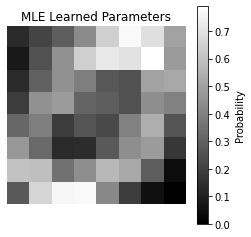

In [3]:
# Initialize an array to store Maximum Likelihood Estimates (MLE) for each pixel
theta_mle = np.zeros(num_pixels)

# Compute MLE for each pixel
for pixel_index in range(num_pixels):
    # Sum of the pixel values across all samples
    pixel_sum = np.sum(data_matrix[:, pixel_index])

    # MLE estimate for the pixel's Bernoulli parameter
    theta_mle[pixel_index] = pixel_sum / num_samples

# Reshape the MLE parameter vector to an 8x8 matrix for visualization
theta_mle_image = theta_mle.reshape((8, 8))

# Plot the MLE parameters as an 8x8 image
plt.figure(figsize=(4, 4))
plt.imshow(theta_mle_image, cmap='gray')
plt.title('MLE Learned Parameters')
plt.colorbar(label='Probability')
plt.axis('off')  # Hide axis for better visualization
plt.savefig('Figure2.png', dpi=300)
plt.show()

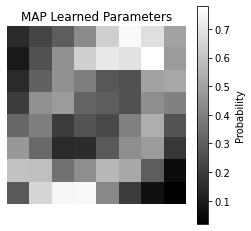

In [4]:
# Define the prior parameters for the Beta distribution
alpha_prior = 3
beta_prior = 3

# Initialize an array to store MAP estimates for each pixel
theta_map = np.zeros(num_pixels)

# Compute MAP for each pixel
for pixel_index in range(num_pixels):
    # Sum of the pixel values across all samples
    pixel_sum = np.sum(data_matrix[:, pixel_index])

    # MAP estimate for the pixel's Bernoulli parameter
    theta_map[pixel_index] = (pixel_sum + alpha_prior - 1) / (num_samples + alpha_prior + beta_prior - 2)

# Reshape the MAP parameter vector to an 8x8 matrix for visualization
theta_map_image = theta_map.reshape((8, 8))

# Plot the MAP parameters as an 8x8 image
plt.figure(figsize=(4, 4))
plt.imshow(theta_map_image, cmap='gray')
plt.title('MAP Learned Parameters')
plt.colorbar(label='Probability')
plt.axis('off')  # Hide axis for better visualization
plt.savefig('Figure3.png', dpi=300)
plt.show()

# Explanation:
# The MAP estimate incorporates prior beliefs about the parameters through the Beta prior.
# With α = β = 3, the prior is symmetric and favors parameters around 0.5.
# This can be beneficial in cases with limited data by preventing extreme estimates.
# However, if the true underlying parameters are near 0 or 1, the MAP estimate
# may be biased towards 0.5, making it worse than the MLE in such scenarios.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm

# Load the data
# Ensure 'binarydigits.txt' is in the same directory as this script
data = np.loadtxt('binarydigits.txt')
N, D = data.shape

# Select a specific pixel to illustrate (e.g., pixel index 0)
# You can change the index to visualize different pixels
pixel_index = 0
pixel_values = data[:, pixel_index]

# Compute the empirical probability p for the selected pixel
p = np.mean(pixel_values)
print(f"Empirical probability p for pixel {pixel_index + 1}: {p:.2f}")

# Define x values for the Bernoulli distribution (0 and 1)
x_bernoulli = [0, 1]
bernoulli_probs = bernoulli.pmf(x_bernoulli, p)

# Define the range for the Gaussian distribution
# Extending beyond [0, 1] to show the tails
x_gaussian = np.linspace(-0.5, 1.5, 400)
gaussian_mean = p
gaussian_std = np.sqrt(p * (1 - p))
gaussian_probs = norm.pdf(x_gaussian, loc=gaussian_mean, scale=gaussian_std)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot Bernoulli PMF as blue bars
plt.bar(x_bernoulli, bernoulli_probs, width=0.1, color='blue', alpha=0.6, label='Bernoulli PMF')

# Plot Gaussian PDF as a red curve
plt.plot(x_gaussian, gaussian_probs, color='red', label='Gaussian PDF')

# Add titles and labels
plt.title(f'Figure 1: Bernoulli vs. Gaussian Distribution for Pixel {pixel_index + 1}')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')

# Set x-ticks to show only 0 and 1 for Bernoulli
plt.xticks(x_bernoulli)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure as 'Figure1.png'
plt.savefig('Figure1.png', dpi=300)

# Display the plot
plt.show()